In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Optional, Tuple, List

# Data Wrangling  

The objective of this section is to clean the data and merge the two datasets in a consistent manner, leaving only the data of interest.

OC Dataset is an xlsx file composed by multiple pages.  
Extract the page of interest (data of 2023)

## Load Data

In [3]:
# select the data used between 2021 or 2023
data_used = 2021

if data_used == 2023:
    target_name = 'criminality_avg_oc'
elif data_used == 2021:
    target_name = 'criminality_oc'
    
# sheetname: 1=2023 data, 2=2021 data
if data_used==2023:
    sheet_name=1
elif data_used==2021:
    sheet_name=2
    

In [4]:
df_oc = pd.read_excel('Data/global_oc_index.xlsx', sheet_name=sheet_name)

In [5]:
df_oc.to_csv('Data/oc_2023.csv')

In [6]:
df_oc

,Continent,Region,Country,Criminality,Criminal markets,Human trafficking,Human smuggling,Arms trafficking,Flora crimes,Fauna crimes,...,International cooperation,National policies and laws,Judicial system and detention,Law enforcement,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors
0,Asia,Western Asia,Turkey,6.89,6.40,7.0,9.0,9.0,4.0,3.0,...,3.5,4.5,2.0,3.0,6.5,2.0,4.0,4.0,3.5,3.5
1,Africa,West Africa,Cabo Verde,4.04,3.70,4.5,2.0,2.5,2.5,4.0,...,8.5,7.0,7.0,6.0,7.5,5.0,6.0,3.5,6.0,7.0
2,Africa,Southern Africa,South Africa,6.63,6.00,4.5,4.0,8.0,3.5,7.5,...,6.5,6.5,6.0,5.0,6.0,6.0,6.0,4.0,5.0,7.0
3,Americas,South America,Colombia,7.66,7.20,7.5,7.0,8.0,6.0,7.0,...,9.0,7.0,5.5,6.0,4.5,6.0,5.0,3.5,4.5,6.5
4,Americas,South America,Peru,6.35,6.20,7.0,6.0,5.5,7.0,5.5,...,5.0,6.0,6.0,5.0,5.0,4.5,4.0,3.5,3.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Americas,Caribbean,Jamaica,5.91,4.20,5.0,3.0,8.5,1.5,2.0,...,6.5,5.5,4.0,6.0,6.5,4.5,4.5,5.0,6.0,6.5
189,Americas,Caribbean,St. Vincent and the Grenadines,3.30,2.85,2.5,1.0,4.0,1.0,2.0,...,6.0,6.5,6.0,4.5,6.0,5.5,4.0,3.0,6.0,6.0
190,Europe,Central & Eastern Europe,Slovenia,4.29,3.95,4.0,5.5,3.5,2.0,3.0,...,6.5,6.5,6.0,6.0,7.5,6.5,5.0,6.0,6.0,6.0
191,Americas,Caribbean,St. Lucia,4.09,3.05,4.0,1.5,5.0,2.0,1.0,...,6.5,6.5,6.0,4.5,5.5,4.0,5.5,5.0,6.0,4.0


Now load WDI Dataset. 
Each row in this dataset contains the value of a single index for a state. Each column corresponds to the year to which the data refers.
Therefore, multiple rows refer to a single state.

In [7]:
df_wdi = pd.read_csv('Data/WDICSV.csv')

In [8]:
df_wdi

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.001597,18.558234,19.043572,19.586457,20.192064,20.828814,21.372164,22.100884,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,7.096003,7.406706,7.666648,8.020952,8.403358,8.718306,9.097176,9.473374,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,38.488233,38.779953,39.068462,39.445526,39.818645,40.276374,40.687817,41.211606,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,33.922276,38.859598,40.223744,43.035073,44.390861,46.282371,48.127211,48.801258,50.668330,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.527554,24.627753,25.432092,27.061929,29.154282,31.022083,32.809138,33.783960,35.375216,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403251,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403252,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.700000,NaN,NaN,NaN,5.400000,NaN,NaN,NaN,NaN,NaN
403253,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.400000,NaN,NaN,NaN,33.700000,NaN,NaN,NaN,NaN,NaN
403254,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,58.687901,58.916636,59.131787,59.318579,59.495248,59.675019,59.832577,59.955283,60.053675,60.155308


In [9]:
# filter only column relative to 2021 or 2023
filter_columns = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', f'{str(data_used)}']
df_wdi = df_wdi[filter_columns]

In [10]:
df_wdi.to_csv('Data/wdi_2023.csv')

In [11]:
df_wdi

,Country Name,Country Code,Indicator Name,Indicator Code,2021
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,21.372164
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,9.097176
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,40.687817
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,48.127211
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,32.809138
...,...,...,...,...,...
403251,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN
403252,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN
403253,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN
403254,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,59.832577


In [12]:
y_oc = set(sorted(df_oc.Country.unique()))

## Feature Engineering

The WDI dataset also contains data on groups of countries (such as African Eastern and Southern).  
Let's remove them, keeping only the data for individual countries via the OC dataset column.

In [13]:
# These States'names are different between the two dataset. This is the mapping to fix it
COUNTRY_NAME_MAPPING = {
    'Bahamas, The': 'Bahamas',
    'Brunei Darussalam': 'Brunei',
    'Czechia': 'Czech Republic',
    "Cote d'Ivoire": "Côte d'Ivoire",
    'Egypt, Arab Rep.': 'Egypt',
    'Eswatini': 'eSwatini',
    'Gambia, The': 'Gambia',
    'Iran, Islamic Rep.': 'Iran',
    "Korea, Dem. People's Rep.": 'Korea, DPR',
    'Korea, Rep.': 'Korea, Rep,',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Lao PDR': 'Laos',
    'Micronesia, Fed. Sts.': 'Micronesia (Federated States of)',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Somalia, Fed. Rep.': 'Somalia',
    'St. Kitts and Nevis': 'St, Kitts and Nevis',
    'St. Lucia': 'St, Lucia',
    'St. Vincent and the Grenadines': 'St, Vincent and the Grenadines',
    'Syrian Arab Republic': 'Syria',
    'Turkiye': 'Turkey',
    'Venezuela, RB': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Yemen, Rep.': 'Yemen',
    'Congo, Dem. Rep.': 'Congo, Dem, Rep,',
    'Congo, Rep.': 'Congo, Rep,',
}

In [14]:
# These States'names are different between the two dataset. This is the mapping to fix it
COUNTRY_NAME_MAPPING_2021 = {
    'Bahamas, The': 'Bahamas',
    'Brunei Darussalam': 'Brunei',
    'Czechia': 'Czech Republic',
    "Cote d'Ivoire": "Côte d'Ivoire",
    'Egypt, Arab Rep.': 'Egypt',
    'eSwatini': 'Eswatini',
    'Gambia, The': 'Gambia',
    'Iran, Islamic Rep.': 'Iran',
    "Korea, Dem. People's Rep.": 'Korea, DPR',
    'Korea, Rep,': 'Korea, Rep.',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Lao PDR': 'Laos',
    'Micronesia, Fed. Sts.': 'Micronesia (Federated States of)',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Somalia, Fed. Rep.': 'Somalia',
    'St, Kitts and Nevis': 'St. Kitts and Nevis',
    'St, Lucia': 'St. Lucia',
    'St, Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'Syrian Arab Republic': 'Syria',
    'Turkiye': 'Turkey',
    'Venezuela, RB': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Yemen, Rep.': 'Yemen',
    'Congo, Dem, Rep.': 'Congo, Dem. Rep,',
    'Congo, Rep,': 'Congo, Rep.',
}

In [15]:
oc_countries = df_oc['Country'].tolist()

In [16]:
if data_used == 2021:
    df_wdi['Country_standardized'] = df_wdi['Country Name'].replace(COUNTRY_NAME_MAPPING_2021)
elif data_used == 2023:
    df_wdi['Country_standardized'] = df_wdi['Country Name'].replace(COUNTRY_NAME_MAPPING)

/tmp/ipykernel_6103/63248643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wdi['Country_standardized'] = df_wdi['Country Name'].replace(COUNTRY_NAME_MAPPING_2021)


In [17]:
# Hold only rows with countries in OC Index
oc_countries = df_oc['Country'].tolist()
oc_countries_set = set(oc_countries)
df_wdi_filtered = df_wdi[df_wdi['Country_standardized'].isin(oc_countries_set)].copy()

WDI Dataset contains a great many indicators. I select those that could be most relevant for this project.

In [18]:
df_wdi_filtered['Indicator Code'].value_counts()

Indicator Code
EG.CFT.ACCS.ZS       193
EG.CFT.ACCS.RU.ZS    193
EG.CFT.ACCS.UR.ZS    193
EG.ELC.ACCS.ZS       193
EG.ELC.ACCS.RU.ZS    193
                    ... 
SG.VAW.REFU.ZS       193
SP.M15.2024.FE.ZS    193
SP.M18.2024.FE.ZS    193
SH.DYN.AIDS.FE.ZS    193
SH.HIV.INCD.YG       193
Name: count, Length: 1516, dtype: int64

In [19]:
# Factors like low PIL, youth unemployment or income inequality (GINI index) could be correlated to higher crime presence in a country
economic_indicators = [
    'NY.GDP.PCAP.CD',           # GDP per capita (current US$)
    'NY.GDP.MKTP.KD.ZG',        # GDP growth (annual %)
    'SL.UEM.TOTL.ZS',           # Unemployment, total (% of labor force)
    'SL.UEM.1524.ZS',           # Youth unemployment (ages 15-24, %)
    'SI.POV.GINI',              # Gini index (income inequality)
    'FP.CPI.TOTL.ZG',           # Inflation, consumer prices (annual %)
    'NE.TRD.GNFS.ZS',           # Trade (% of GDP)
]

# Low education and school dropout could push to get involved in crime
education_indicators = [
    'SE.XPD.TOTL.GD.ZS',        # Government expenditure on education (% of GDP)
    'SE.PRM.NENR',              # School enrollment, primary (% net)
    'SE.SEC.ENRR',              # School enrollment, secondary (% gross)
    'SE.ADT.LITR.ZS',           # Literacy rate, adult total (% of people ages 15+)
]

# Weak healtcare systems can create illegal market for drug/organs. Or large young population could indicate more potential recruits
health_indicators = [
    'SP.DYN.LE00.IN',           # Life expectancy at birth (years)
    'SH.XPD.CHEX.GD.ZS',        # Current health expenditure (% of GDP)
    'SP.POP.TOTL',              # Population, total
    'SP.URB.TOTL.IN.ZS',        # Urban population (% of total)
    'SP.POP.1564.TO.ZS',        # Population ages 15-64 (% of total) - working age
]

# These could be the most important, indicating high corruption, weak rule of law or politic instability: each one is a determinant factor in the proliferation of organized crime 
governance_indicators = [
    'CC.EST',                   # Control of Corruption (estimate)
    'GE.EST',                   # Government Effectiveness (estimate)
    'PV.EST',                   # Political Stability and Absence of Violence (estimate)
    'RL.EST',                   # Rule of Law (estimate)
    'RQ.EST',                   # Regulatory Quality (estimate)
    'VA.EST',                   # Voice and Accountability (estimate)
]


# a weak banking system or complex regulations could increase money laundering or corruption
business_indicators = [
    
    'FB.AST.NPER.ZS',           # Bank nonperforming loans (% of total loans)
    'CM.MKT.LCAP.GD.ZS',        # Market capitalization (% of GDP)
]

In [20]:
# Factors like low PIL, youth unemployment or income inequality (GINI index) could be correlated to higher crime presence in a country
economic_indicators = [
    'NY.GDP.PCAP.CD',           # GDP per capita (current US$) X
    'NY.GDP.MKTP.KD.ZG',        # GDP growth (annual %) X
    'SL.UEM.TOTL.ZS',           # Unemployment, total (% of labor force) X
    'SL.UEM.1524.ZS',           # Youth unemployment (ages 15-24, %) X
    'SI.POV.GINI',              # Gini index (income inequality)
    'FP.CPI.TOTL.ZG',           # Inflation, consumer prices (annual %) X
    'NE.TRD.GNFS.ZS',           # Trade (% of GDP) X
]

# Low education and school dropout could push to get involved in crime
education_indicators = [
    'SE.XPD.TOTL.GD.ZS',        # Government expenditure on education (% of GDP)
    'SE.PRM.NENR',              # School enrollment, primary (% net)
    'SE.SEC.ENRR',              # School enrollment, secondary (% gross) X
    'SE.ADT.LITR.ZS',           # Literacy rate, adult total (% of people ages 15+)
]

# Weak healtcare systems can create illegal market for drug/organs. Or large young population could indicate more potential recruits
health_indicators = [
    'SP.DYN.LE00.IN',           # Life expectancy at birth (years) X
    'SH.XPD.CHEX.GD.ZS',        # Current health expenditure (% of GDP)
    'SP.POP.TOTL',              # Population, total X
    'SP.URB.TOTL.IN.ZS',        # Urban population (% of total) X
    'SP.POP.1564.TO.ZS',        # Population ages 15-64 (% of total) - working age X
]

# These could be the most important, indicating high corruption, weak rule of law or politic instability: each one is a determinant factor in the proliferation of organized crime 
governance_indicators = [
    'CC.EST',                   # Control of Corruption (estimate) X
    'GE.EST',                   # Government Effectiveness (estimate) X
    'PV.EST',                   # Political Stability and Absence of Violence (estimate) X
    'RL.EST',                   # Rule of Law (estimate) X
    'RQ.EST',                   # Regulatory Quality (estimate) X
    'VA.EST',                   # Voice and Accountability (estimate) X
]


# a weak banking system or complex regulations could increase money laundering or corruption
business_indicators = [
    
    'FB.AST.NPER.ZS',           # Bank nonperforming loans (% of total loans)
    'CM.MKT.LCAP.GD.ZS',        # Market capitalization (% of GDP)
]

In [21]:
ALL_INDICATORS = [economic_indicators, education_indicators, health_indicators, governance_indicators, business_indicators]

Let's start by selecting all these indicators. We'll see later how much they influence the importance

In [22]:
INDICATORS = []

for l in ALL_INDICATORS:
    for i in l:
        INDICATORS.append(i)


In [23]:
def select_wdi_indicators(df_wdi: pd.DataFrame, indicator_codes) -> pd.DataFrame:
    """ 
    Function to filter wdi dataset indexes
    """
    
    df_filtered = df_wdi[df_wdi['Indicator Code'].isin(indicator_codes)].copy()
    
    found = set(df_filtered['Indicator Code'].unique())
    missing = set(indicator_codes) - found
    if missing: 
        print(f'\n Indicator not found in WDI:')
        for code in missing:
            print(f"    {code}")
    
    return df_filtered
       
    

In [24]:
df_wdi_selected = select_wdi_indicators(df_wdi_filtered, indicator_codes=INDICATORS)

In [25]:
del df_wdi_selected['Country Name']
del df_wdi_selected['Country Code']

In [26]:
df_wdi_selected.columns


Index(['Indicator Name', 'Indicator Code', '2021', 'Country_standardized'], dtype='object')

In [27]:
col = "Country_standardized"
cols = [col] + [c for c in df_wdi_selected.columns if c != col]
df_wdi_selected = df_wdi_selected[cols]

In [28]:
df_wdi_selected

,Country_standardized,Indicator Name,Indicator Code,2021
74393,Afghanistan,Bank nonperforming loans to total gross loans (%),FB.AST.NPER.ZS,NaN
74560,Afghanistan,Control of Corruption: Estimate,CC.EST,-1.152266
74612,Afghanistan,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,21.508461
74802,Afghanistan,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,-20.738839
74806,Afghanistan,GDP per capita (current US$),NY.GDP.PCAP.CD,356.496214
...,...,...,...,...
403165,Zimbabwe,Trade (% of GDP),NE.TRD.GNFS.ZS,50.847123
403208,Zimbabwe,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,9.540000
403214,Zimbabwe,"Unemployment, youth total (% of total labor fo...",SL.UEM.1524.ZS,15.208000
403221,Zimbabwe,Urban population (% of total population),SP.URB.TOTL.IN.ZS,32.303000


Pivot the wdi dataframe, to have a country for each row

In [29]:
df_wdi_pivoted = df_wdi_selected.pivot(index = 'Country_standardized', columns = 'Indicator Name', values = f'{str(data_used)}')

Check if there are null values

In [30]:
df_wdi_pivoted.isna().sum()

Indicator Name
Bank nonperforming loans to total gross loans (%)                                        57
Control of Corruption: Estimate                                                           0
Current health expenditure (% of GDP)                                                     2
GDP growth (annual %)                                                                     6
GDP per capita (current US$)                                                              6
Gini index                                                                              115
Government Effectiveness: Estimate                                                        0
Government expenditure on education, total (% of GDP)                                    35
Inflation, consumer prices (annual %)                                                    20
Life expectancy at birth, total (years)                                                   0
Literacy rate, adult total (% of people ages 15 and above)       

In [31]:
n_countries: int = len(df_wdi_pivoted)

# Compute missing for each indicator
missing_counts: pd.Series = df_wdi_pivoted.isnull().sum()
missing_pct = ((missing_counts/n_countries)*100).round(2)
print(type(missing_pct))    

<class 'pandas.core.series.Series'>


## Handling missing values

In [32]:
def analyze_missing_by_indicator(df: pd.DataFrame, threshold: float = 0.40) -> Optional[Tuple[pd.DataFrame, List, List]]:
    """Analize missing values for each indicator

    Args:
        df (pd.DataFrame): Pivoted df
        threshold (float, optional): Threshold for drop or not. Defaults to 0.40.

    Returns:
        Optional[Tuple[pd.DataFrame, List, List]]: Dataframe with report of missing values for each indicator, List of indicator to keep, List of indicator to drop
    """
    n_countries: int = len(df)
    
    # Compute missing for each indicator
    missing_counts: pd.Series = df.isnull().sum()
    missing_pct: pd.Series = ((missing_counts/n_countries)*100).round(2)
    
    # Create report
    report: pd.DataFrame = pd.DataFrame({
        'indicator': missing_counts.index, 
        'missing_count': missing_counts.values,
        'missing_pct':  missing_pct,
        'available_count': n_countries - missing_counts.values, 
        'available_pct': (100 - missing_pct.values).round(2)
    }).sort_values('missing_pct', ascending=False)
    
    indicators_to_drop: List = report[report['missing_pct'] > threshold*100]['indicator'].tolist()
    indicators_to_keep: List = report[report['missing_pct'] <= threshold*100]['indicator'].tolist()
    
    # print report
    print('='*50)
    print('Missing values analysis by indicator')
    print('='*50)
    print(f"Elimination Threshold: {threshold*100}%")
    print(f"Number of countries: {n_countries}")    
    print(f"Number of total indicators: {len(df.columns)}")
    
    print(f"Indicators to keep: {len(indicators_to_keep)}")
    print(f"Missing <= {threshold*100}%")
    for _, row in report[report['missing_pct'] <= threshold * 100].iterrows():
        print(f"    ++ {row['indicator'][:50]:50s} - {row['missing_pct']:5.1f}% Missing ({row['available_count']}/{n_countries} countries)" ) 
    
    print(f"Indicators to drop ({len(indicators_to_drop)})")
    print(f"Missing > {threshold*100}%")
    for _, row in report[report['missing_pct'] > threshold * 100].iterrows():
        print(f"    ++ {row['indicator'][:50]:50s} - {row['missing_pct']:5.1f}% Missing ({row['available_count']}/{n_countries} countries)" ) 
        
    print('='*50)
    
    return report, indicators_to_keep, indicators_to_drop
    
    
        

In [33]:
def analyze_missing_by_country(df: pd.DataFrame, indicators_to_keep: List) -> pd.DataFrame: 
    """Analize missing values for each country

    Args:
        df (pd.DataFrame): Pivoted df
        indicators_to_keep (List): Indicators to keep from 'analyze_missing_by_indicator'

    Returns:
        report (pd.DataFrame): dataframe with statistics for each country
    """
    # Filter only valid indicators
    df_filtered = df[indicators_to_keep].copy()
    n_indicators = len(indicators_to_keep)
    
    # Compute missing per country
    missing_counts: pd.Series = df_filtered.isnull().sum(axis=1)
    missing_pct: pd.Series = (missing_counts/n_indicators % 100).round(2)
    
    # Generate Report df
    report = pd.DataFrame({
        'country': df_filtered.index, 
        'missing_count': missing_counts.values, 
        'missing_pct': missing_pct.values,
        'available_count': n_indicators - missing_counts.values,
        'available_pct': (100 - missing_pct.values).round(2)
    }).sort_values('missing_pct', ascending=False)
    
    # print report
    print('='*50)
    print('Missing values analysis by country')
    print('='*50)
    print(f"Number of considered indicators: {n_indicators}")
    print(f"Number of countries: {len(df_filtered)}")    

    print('Summary statistics')
    print(f"    Average missing for each country: {missing_pct.mean():.1f}%")
    print(f"    Median missing for each country: {missing_pct.median():.1f}%")
    print(f"    Max missing for each country: {missing_pct.max():.1f}%")
    print(f"    Min missing for each country: {missing_pct.min():.1f}%")

    # Top 10 countries with more missing
    print(f"Top 10 countries with more missing")
    for _, row in report.head(10).iterrows():
        print(f"    ++ {row['country']:35s} - {row['missing_pct']:5.1f}% missing ({row['available_count']}/{n_indicators} indicators)")
    
    # Top 10 countries with less missing
    print(f"Top 10 countries with less missing")
    for _, row in report.tail(10).iterrows():
        print(f"    ++ {row['country']:35s} - {row['missing_pct']:5.1f}% missing ({row['available_count']}/{n_indicators} indicators)")
        
    print('='*50)
    
    return report

In [34]:
_, indicators_to_keep, _ = analyze_missing_by_indicator(df_wdi_pivoted,)
analyze_missing_by_country(df_wdi_pivoted, indicators_to_keep)

Missing values analysis by indicator
Elimination Threshold: 40.0%
Number of countries: 193
Number of total indicators: 24
Indicators to keep: 20
Missing <= 40.0%
    ++ Bank nonperforming loans to total gross loans (%)  -  29.5% Missing (136/193 countries)
    ++ School enrollment, secondary (% gross)             -  27.5% Missing (140/193 countries)
    ++ Government expenditure on education, total (% of G -  18.1% Missing (158/193 countries)
    ++ Trade (% of GDP)                                   -  13.5% Missing (167/193 countries)
    ++ Inflation, consumer prices (annual %)              -  10.4% Missing (173/193 countries)
    ++ Unemployment, total (% of total labor force) (mode -   7.8% Missing (178/193 countries)
    ++ Unemployment, youth total (% of total labor force  -   7.8% Missing (178/193 countries)
    ++ GDP growth (annual %)                              -   3.1% Missing (187/193 countries)
    ++ GDP per capita (current US$)                       -   3.1% Missing (18

,country,missing_count,missing_pct,available_count,available_pct
89,"Korea, DPR",8,0.40,12,99.60
99,Liechtenstein,8,0.40,12,99.60
188,Venezuela,7,0.35,13,99.65
190,Yemen,7,0.35,13,99.65
54,Eritrea,7,0.35,13,99.65
...,...,...,...,...,...
181,Ukraine,0,0.00,20,100.00
177,Turkey,0,0.00,20,100.00
186,Uzbekistan,0,0.00,20,100.00
185,Uruguay,0,0.00,20,100.00


In [35]:
def plot_missing_analysis(df: pd.DataFrame, indicator_report: pd.DataFrame, country_report, save_path: str = None):
    """Creates visualizations for missing value analysis
    """
    fig, axes = plt.subplots(1, 2, figsize=(10, 6))
    fig.suptitle('Missing Value Analysis', fontsize=16, fontweight='bold')
    
    # Bar chart for missing indicators
    ax1 = axes[0]
    top_missing_indicators = indicator_report.nlargest(15, 'missing_pct')
    ax1.barh(range(len(top_missing_indicators)), top_missing_indicators['missing_pct'])
    ax1.set_yticks(range(len(top_missing_indicators)))
    ax1.set_yticklabels([ind[:40] for ind in top_missing_indicators['indicator']], fontsize=8)
    ax1.set_xlabel('Missing %')
    ax1.set_title('Top 15 indicators with most missing values')
    ax1.axvline(x=40, color='red', linestyle='--', label = '40% threshold')
    ax1.legend()
    ax1.invert_yaxis()
    
    # Histogram missing % per country
    ax2 = axes[1]
    ax2.hist(country_report['missing_pct'], bins=10, edgecolor='black', alpha=0.7)
    ax2.set_xlabel('Missing % per country')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Distribution of missing values across countries')
    ax2.axvline(x=country_report['missing_pct'].mean(), color='red', linestyle='--', label = f'Mean: {country_report['missing_pct'].mean():.1f}%')
    ax2.legend()
    
    # # Scatter of countries with most missing
    # ax3 = axes[1,0]
    # top_20_countries = country_report.nlargest(20, 'missing_pct')
    # ax3.scatter(range(len(top_20_countries)), top_20_countries['missing_pct'], s = 100, alpha = 0.6, 
    #             c = top_20_countries['missing_pct'], cmap='Reds')
    # ax3.set_xticks(range(len(top_20_countries)))
    # ax3.set_xticklabels([c[:15] for c in top_20_countries['country']], rotation = 45, ha = 'right', fontsize = 8)
    # ax3.set_ylabel('Missing %')
    # ax3.set_title('Top 20 countries with most missing values')
    # ax3.grid(True, alpha=0.3)
    
    # # Heatmap
    # ax4 = axes[1,1]
    # sample_countries = country_report.nlargest(10, 'missing_pct')['country'].tolist()
    # sample_indicators = indicator_report.nlargest(10, 'missing_pct')['indicator'].tolist()
    # df_sample = df.loc[sample_countries, sample_indicators]
    # mask = df_sample.isnull()
    
    # sns.heatmap(mask, cmap = 'RdYlGn_r', cbar_kws={'label': 'Missing (1=Yes, 0=No)'},
    #             ax=ax4, yticklabels=[c[:20] for c in sample_countries],
    #             xticklabels=[i[:20] for i in sample_indicators]
    #             )        
    # ax4.set_title('Missing Value Heatmap (Top 10 countries * Top 10 indicators)')
    # plt.setp(ax4.get_xticklabels(), rotation = 45, ha ='right', fontsize=7)
    # plt.setp(ax4.get_yticklabels(), fontsize=7)
    # plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches = 'tight')
        print(f"\n Viz saved in {save_path}")
    plt.show()
    
    

In [36]:
def clean_dataset(df: pd.DataFrame, indicators_to_keep: List, country_threshold: float = None) -> tuple[pd.DataFrame, dict]:
    """_summary_

    Args:
        df (pd.DataFrame): Original Df
        indicators_to_keep (List): List indicators to keep
        country_threshold (float, optional): If defined, it removes countring with missing > threshold %. Defaults to None.

    Returns:
        _type_: _description_
    """
    df_clean = df[indicators_to_keep].copy()
    
    # Optional: Remove countries with too many missing
    if country_threshold:
        missing_pct = df_clean.isnull().sum(axis=1)/len(indicators_to_keep) * 100
        countries_to_keep = missing_pct[missing_pct <= country_threshold].index
        df_clean = df_clean.loc[countries_to_keep]
        
    # report
    report = {
        'original_shape': df.shape,
        'clean_shape': df_clean.shape, 
        'indicators_removed': len(df.columns) - len(indicators_to_keep),
        'countries_removed': len(df) - len(df_clean),
        'total_cells_original': df.shape[0] * df.shape[1],
        'total_cells_clean': df_clean.shape[0] * df_clean.shape[1],
        'missing_cells_original': int(df.isnull().sum().sum()),
        'missing_cells_clean': int(df_clean.isnull().sum().sum()),
        'missing_pct_original': round(float((df.isnull().sum().sum() / (df.shape[0]*df.shape[1]) *100)),2),
        'missing_pct_clean': round(float((df_clean.isnull().sum().sum() / (df_clean.shape[0]*df_clean.shape[1]) *100)),2)
    }
    
    print("\n" + "="*50)
    print("CLEANING REPORT")
    print("="*50)
    print(f"Original Shape: {report['original_shape']}")
    print(f"Clean shape: {report['clean_shape']}")
    print(f"Indicators Removed: {report['indicators_removed']}")
    print(f"Countries Removed: {report['countries_removed']}")
    print(f"\nMissing values:")
    print(f"    Before: {report['missing_cells_original']:,} cells ({report['missing_pct_original']:.2f}%)")
    print(f"    After: {report['missing_cells_clean']:,} cells ({report['missing_pct_clean']:.2f}%)")
    print("="*50)
    
    return df_clean, report

In [37]:
indicator_report, indicators_to_keep, indicators_to_drop = analyze_missing_by_indicator(df_wdi_pivoted)

Missing values analysis by indicator
Elimination Threshold: 40.0%
Number of countries: 193
Number of total indicators: 24
Indicators to keep: 20
Missing <= 40.0%
    ++ Bank nonperforming loans to total gross loans (%)  -  29.5% Missing (136/193 countries)
    ++ School enrollment, secondary (% gross)             -  27.5% Missing (140/193 countries)
    ++ Government expenditure on education, total (% of G -  18.1% Missing (158/193 countries)
    ++ Trade (% of GDP)                                   -  13.5% Missing (167/193 countries)
    ++ Inflation, consumer prices (annual %)              -  10.4% Missing (173/193 countries)
    ++ Unemployment, total (% of total labor force) (mode -   7.8% Missing (178/193 countries)
    ++ Unemployment, youth total (% of total labor force  -   7.8% Missing (178/193 countries)
    ++ GDP growth (annual %)                              -   3.1% Missing (187/193 countries)
    ++ GDP per capita (current US$)                       -   3.1% Missing (18

In [38]:
country_report = analyze_missing_by_country(df_wdi_pivoted, indicators_to_keep)

Missing values analysis by country
Number of considered indicators: 20
Number of countries: 193
Summary statistics
    Average missing for each country: 0.1%
    Median missing for each country: 0.1%
    Max missing for each country: 0.4%
    Min missing for each country: 0.0%
Top 10 countries with more missing
    ++ Korea, DPR                          -   0.4% missing (12/20 indicators)
    ++ Liechtenstein                       -   0.4% missing (12/20 indicators)
    ++ Venezuela                           -   0.3% missing (13/20 indicators)
    ++ Yemen                               -   0.3% missing (13/20 indicators)
    ++ Eritrea                             -   0.3% missing (13/20 indicators)
    ++ South Sudan                         -   0.3% missing (14/20 indicators)
    ++ Monaco                              -   0.3% missing (14/20 indicators)
    ++ Andorra                             -   0.2% missing (15/20 indicators)
    ++ Nauru                               -   0.2% mis


 Viz saved in graph.png


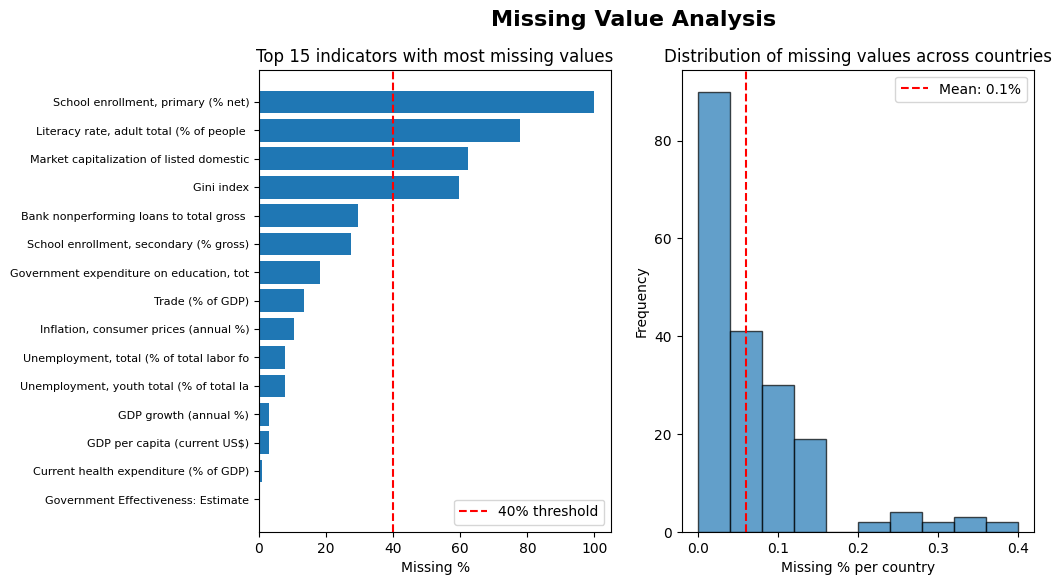

In [39]:
plot_missing_analysis(df_wdi_pivoted, indicator_report, country_report, save_path='graph.png')

In [40]:
df_wdi_clean, cleaning_report = clean_dataset(df_wdi_pivoted, indicators_to_keep)


CLEANING REPORT
Original Shape: (193, 24)
Clean shape: (193, 20)
Indicators Removed: 4
Countries Removed: 0

Missing values:
    Before: 813 cells (17.55%)
    After: 235 cells (6.09%)


In [41]:
cleaning_report

{'original_shape': (193, 24),
 'clean_shape': (193, 20),
 'indicators_removed': 4,
 'countries_removed': 0,
 'total_cells_original': 4632,
 'total_cells_clean': 3860,
 'missing_cells_original': 813,
 'missing_cells_clean': 235,
 'missing_pct_original': 17.55,
 'missing_pct_clean': 6.09}

In this way, we have removed indicators with too many null values, but there are still several ones.  
I decided that the best way to fill them in is to use the mean based on countries belonging to the same continent as the country with null values. In this way, we give a more specific estimate that does not deviate too much from reality (e.g, the average GDP of African countries is different from that of European ones)


In [42]:
# OC dataset already has the continent column, so map each state to its continent
country_to_continent = df_oc.set_index('Country')['Continent'].to_dict()

In [43]:
country_to_continent

{'Turkey': 'Asia',
 'Cabo Verde': 'Africa',
 'South Africa': 'Africa',
 'Colombia': 'Americas',
 'Peru': 'Americas',
 'Iraq': 'Asia',
 'Suriname': 'Americas',
 'Venezuela': 'Americas',
 'Mauritius': 'Africa',
 'Botswana': 'Africa',
 'Iran': 'Asia',
 'Guyana': 'Americas',
 'Senegal': 'Africa',
 'Brazil': 'Americas',
 'Cambodia': 'Asia',
 'Nigeria': 'Africa',
 'Philippines': 'Asia',
 'Rwanda': 'Africa',
 'Ghana': 'Africa',
 'Ethiopia': 'Africa',
 'Bolivia': 'Americas',
 'Kenya': 'Africa',
 'Afghanistan': 'Asia',
 'Indonesia': 'Asia',
 'Gambia': 'Africa',
 'Namibia': 'Africa',
 'Mexico': 'Americas',
 'Sao Tome and Principe': 'Africa',
 'Tunisia': 'Africa',
 'Algeria': 'Africa',
 'Morocco': 'Africa',
 'Seychelles': 'Africa',
 'Djibouti': 'Africa',
 'India': 'Asia',
 'Angola': 'Africa',
 'Saudi Arabia': 'Asia',
 "Côte d'Ivoire": 'Africa',
 'Switzerland': 'Europe',
 'Yemen': 'Asia',
 'Tajikistan': 'Asia',
 'Zambia': 'Africa',
 'Syria': 'Asia',
 'Turkmenistan': 'Asia',
 'Ireland': 'Europe',
 

In [44]:
df_wdi_clean['continent'] = df_wdi_clean.index.map(country_to_continent) 

In [45]:
df_wdi_clean

Indicator Name,Bank nonperforming loans to total gross loans (%),"School enrollment, secondary (% gross)","Government expenditure on education, total (% of GDP)",Trade (% of GDP),"Inflation, consumer prices (annual %)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)",GDP growth (annual %),GDP per capita (current US$),Current health expenditure (% of GDP),...,Control of Corruption: Estimate,Regulatory Quality: Estimate,"Population, total",Population ages 15-64 (% of total population),Political Stability and Absence of Violence/Terrorism: Estimate,"Life expectancy at birth, total (years)",Rule of Law: Estimate,Urban population (% of total population),Voice and Accountability: Estimate,continent
Country_standardized,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,51.411716,5.133203,11.994,16.395,-20.738839,356.496214,21.508461,...,-1.152266,-1.311682,40000412.0,53.739325,-2.518676,60.417,-1.877234,26.314,-1.568389,Asia
Albania,5.393910,97.665033,3.005560,75.590322,2.041472,11.474,27.244,8.969576,6413.282808,7.399132,...,-0.577180,0.175859,2811666.0,67.366563,0.196372,76.844,-0.280716,62.969,0.085589,Europe
Algeria,19.641599,NaN,5.514033,46.837059,7.226063,13.630,33.843,3.800000,4160.559267,5.011057,...,-0.635961,-1.181963,44761099.0,63.069061,-0.992457,75.208,-0.833023,74.261,-1.013779,Africa
Andorra,NaN,98.040421,2.381922,NaN,NaN,NaN,NaN,8.286779,42425.699676,8.334507,...,1.279687,1.359350,78364.0,72.361495,1.581259,82.331,1.642051,87.858,1.032500,Europe
Angola,14.996088,53.135154,2.297197,74.464499,25.754295,15.799,30.171,1.199211,1925.874661,3.092771,...,-0.649476,-0.670015,34532429.0,52.346046,-0.710481,62.958,-0.983754,67.460,-0.859024,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,NaN,NaN,NaN,NaN,NaN,7.037,12.983,NaN,NaN,4.102220,...,-1.622940,-2.215186,28237826.0,63.991769,-1.454970,71.536,-2.300895,88.325,-1.617731,Americas
Vietnam,1.599111,92.769021,2.945175,186.675833,1.834716,2.385,6.907,2.553729,3704.193559,4.537569,...,-0.308163,-0.404661,98935098.0,67.916650,-0.117782,74.145,-0.172222,38.052,-1.308746,Asia
Yemen,NaN,NaN,NaN,NaN,NaN,18.287,34.130,NaN,NaN,6.175427,...,-1.668677,-2.040683,37140230.0,56.126745,-2.580460,66.019,-1.804350,38.546,-1.680721,Asia


In [46]:
# move continent to first column
col = 'continent'
df_wdi_clean= df_wdi_clean[[col] + [c for c in df_wdi_clean.columns if c != col]] 

In [47]:
missing_summary = df_wdi_clean.isnull().sum()
missing_summary = missing_summary[missing_summary > 0 ]
missing_summary = missing_summary.drop('continent', errors='ignore')

In [48]:
missing_summary_l = list(missing_summary.index)

In [49]:
missing_summary_l

['Bank nonperforming loans to total gross loans (%)',
 'School enrollment, secondary (% gross)',
 'Government expenditure on education, total (% of GDP)',
 'Trade (% of GDP)',
 'Inflation, consumer prices (annual %)',
 'Unemployment, total (% of total labor force) (modeled ILO estimate)',
 'Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)',
 'GDP growth (annual %)',
 'GDP per capita (current US$)',
 'Current health expenditure (% of GDP)']

In [50]:
for col in missing_summary_l:
    print(col)


Bank nonperforming loans to total gross loans (%)
School enrollment, secondary (% gross)
Government expenditure on education, total (% of GDP)
Trade (% of GDP)
Inflation, consumer prices (annual %)
Unemployment, total (% of total labor force) (modeled ILO estimate)
Unemployment, youth total (% of total labor force ages 15-24) (modeled ILO estimate)
GDP growth (annual %)
GDP per capita (current US$)
Current health expenditure (% of GDP)


In [51]:
if len(missing_summary) >0:
    for col in missing_summary.index:
        total_missing = df_wdi_clean[col].isnull().sum()
        print(f"\n+ {col[:60]:60s}")
        print(f'Total missing: {total_missing} ({total_missing/len(df_wdi_clean)*100:.1f}%)')
        
        # Fill null for each continent
        for continent in df_wdi_clean['continent'].unique():
            if pd.isnull(continent):
                continue
            # select countries in the continent
            continent_mask = df_wdi_clean['continent'] == continent
            # count missing values in this continent
            missing_in_continent = df_wdi_clean.loc[continent_mask, col].isnull().sum()
            
            if missing_in_continent > 0:
                # compute continent mead
                continent_mean = df_wdi_clean.loc[continent_mask, col].mean()
                
                # If all the countries of a continent are missing, use global mean
                if pd.isnull(continent_mean):
                    continent_mean = df_wdi_clean[col].mean()
                    print(f"    {continent:20s}: {missing_in_continent:2d} missing → Global mean = {continent_mean:.2f}")
                else:
                    print(f"    {continent:20s}: {missing_in_continent:2d} missing → Continent mean = {continent_mean:.2f}")
                
                # fillna in the df
                df_wdi_clean.loc[continent_mask, col] = df_wdi_clean.loc[continent_mask, col].fillna(continent_mean)
                
        # verify no more missing values
        remaining = df_wdi_clean[col].isnull().sum()            
        if remaining > 0:
            print(f"  !!{remaining} missing values → Use global mean ")
            global_mean = df_wdi_clean[col].mean()
            df_wdi_clean[col].fillna(global_mean, inplace=True)        
        
    # final verify
    total_missing_after = df_wdi_clean[missing_summary.index].isnull().sum().sum()
    assert total_missing_after == 0, f"STILL {total_missing_after} MISSING!!"
    print(f"Sustitution completed: 0 missing values")
else:
    print(f"Sustitution completed: 0 missing values")
    


+ Bank nonperforming loans to total gross loans (%)           
Total missing: 57 (29.5%)
    Asia                : 16 missing → Continent mean = 4.82
    Europe              :  5 missing → Continent mean = 5.53
    Africa              : 22 missing → Continent mean = 10.71
    Americas            :  7 missing → Continent mean = 4.93
    Oceania             :  7 missing → Continent mean = 4.76

+ School enrollment, secondary (% gross)                      
Total missing: 53 (27.5%)
    Asia                : 11 missing → Continent mean = 87.30
    Europe              :  1 missing → Continent mean = 106.50
    Africa              : 29 missing → Continent mean = 62.92
    Americas            :  8 missing → Continent mean = 94.33
    Oceania             :  4 missing → Continent mean = 93.50

+ Government expenditure on education, total (% of GDP)       
Total missing: 35 (18.1%)
    Asia                : 14 missing → Continent mean = 3.65
    Europe              :  4 missing → Continent mea

In [52]:
df_wdi_clean = df_wdi_clean.reset_index()

## Renaming Columns 

In [53]:
df_oc = df_oc.reset_index()

In [54]:
df_oc

,index,Continent,Region,Country,Criminality,Criminal markets,Human trafficking,Human smuggling,Arms trafficking,Flora crimes,...,International cooperation,National policies and laws,Judicial system and detention,Law enforcement,Territorial integrity,Anti-money laundering,Economic regulatory capacity,Victim and witness support,Prevention,Non-state actors
0,0,Asia,Western Asia,Turkey,6.89,6.40,7.0,9.0,9.0,4.0,...,3.5,4.5,2.0,3.0,6.5,2.0,4.0,4.0,3.5,3.5
1,1,Africa,West Africa,Cabo Verde,4.04,3.70,4.5,2.0,2.5,2.5,...,8.5,7.0,7.0,6.0,7.5,5.0,6.0,3.5,6.0,7.0
2,2,Africa,Southern Africa,South Africa,6.63,6.00,4.5,4.0,8.0,3.5,...,6.5,6.5,6.0,5.0,6.0,6.0,6.0,4.0,5.0,7.0
3,3,Americas,South America,Colombia,7.66,7.20,7.5,7.0,8.0,6.0,...,9.0,7.0,5.5,6.0,4.5,6.0,5.0,3.5,4.5,6.5
4,4,Americas,South America,Peru,6.35,6.20,7.0,6.0,5.5,7.0,...,5.0,6.0,6.0,5.0,5.0,4.5,4.0,3.5,3.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,188,Americas,Caribbean,Jamaica,5.91,4.20,5.0,3.0,8.5,1.5,...,6.5,5.5,4.0,6.0,6.5,4.5,4.5,5.0,6.0,6.5
189,189,Americas,Caribbean,St. Vincent and the Grenadines,3.30,2.85,2.5,1.0,4.0,1.0,...,6.0,6.5,6.0,4.5,6.0,5.5,4.0,3.0,6.0,6.0
190,190,Europe,Central & Eastern Europe,Slovenia,4.29,3.95,4.0,5.5,3.5,2.0,...,6.5,6.5,6.0,6.0,7.5,6.5,5.0,6.0,6.0,6.0
191,191,Americas,Caribbean,St. Lucia,4.09,3.05,4.0,1.5,5.0,2.0,...,6.5,6.5,6.0,4.5,5.5,4.0,5.5,5.0,6.0,4.0


In [55]:
import re

Now implement a function for modifying the column names.
For the OC dataset, do these modifies to the columns' name:
* removes punctuation
* substitue white spaces with underscores
* add '_oc' suffix

For the WDI dataset, do these modifies to the columns' name:
* removes punctuation
* substitue white spaces with underscores
* keep only the first 4 words
* add '_wdi' suffix

In [56]:
def modify_name_cols(col: str, suffix: str, remove_punctuation: bool=True, no_white_spaces: bool = True, keep_4_words: bool = True, add_suffix: bool = True ) -> str:
    # Remove punctuation
    if remove_punctuation:
        col = re.sub(r"[^\w\s]", "", col)
    
    if no_white_spaces: 
        # substitue white spaces with underscores
        col = re.sub(r"\s+", "_", col.strip())
    if keep_4_words:
        # keep only the first 4 words
        parts = col.split("_")[:4]
        col = "_".join(parts)
    if add_suffix:
        # add '_wdi' suffix
        col = f"{col}_{suffix}"
        
    # final clean
    col = re.sub(r"_+", "_", col).strip("_").lower()
    return col

In [57]:
df_oc.columns = [modify_name_cols(c, suffix='_oc', keep_4_words=False, ) for c in df_oc.columns]
df_wdi_clean.columns = [modify_name_cols(c, suffix='_wdi' ) for c in df_wdi_clean.columns]

In [58]:
del df_oc['index_oc']

## Merging Datasets

In [59]:
df_merged = df_wdi_clean.merge(df_oc, left_on='country_standardized_wdi', right_on = 'country_oc', how='left', validate='one_to_one')

In [60]:
del df_merged['country_oc']
del df_merged['continent_oc']
del df_merged['region_oc']

In [61]:
df_merged = df_merged.rename(columns={'country_standardized_wdi': 'country', 'continent_wdi':'continent'})

In [62]:
df_merged.columns

Index(['country', 'continent', 'bank_nonperforming_loans_to_wdi',
       'school_enrollment_secondary_gross_wdi',
       'government_expenditure_on_education_wdi', 'trade_of_gdp_wdi',
       'inflation_consumer_prices_annual_wdi',
       'unemployment_total_of_total_wdi', 'unemployment_youth_total_of_wdi',
       'gdp_growth_annual_wdi', 'gdp_per_capita_current_wdi',
       'current_health_expenditure_of_wdi',
       'government_effectiveness_estimate_wdi',
       'control_of_corruption_estimate_wdi', 'regulatory_quality_estimate_wdi',
       'population_total_wdi', 'population_ages_1564_of_wdi',
       'political_stability_and_absence_wdi', 'life_expectancy_at_birth_wdi',
       'rule_of_law_estimate_wdi', 'urban_population_of_total_wdi',
       'voice_and_accountability_estimate_wdi', 'criminality_oc',
       'criminal_markets_oc', 'human_trafficking_oc', 'human_smuggling_oc',
       'arms_trafficking_oc', 'flora_crimes_oc', 'fauna_crimes_oc',
       'nonrenewable_resource_crimes_oc'

Since the OC Crime index is derived from a combination of all other OC variables, we will use only WDI features for our anlysis.  
This will allow us to focus on how closely a country's socio-economic indices are actually correlated with its crime rate

In [63]:
oc_cols_to_drop = [col for col in df_merged.columns if col.endswith('_oc') and col != target_name]

In [64]:
df_merged = df_merged.drop(columns=oc_cols_to_drop)

In [65]:
df_merged

,country,continent,bank_nonperforming_loans_to_wdi,school_enrollment_secondary_gross_wdi,government_expenditure_on_education_wdi,trade_of_gdp_wdi,inflation_consumer_prices_annual_wdi,unemployment_total_of_total_wdi,unemployment_youth_total_of_wdi,gdp_growth_annual_wdi,...,control_of_corruption_estimate_wdi,regulatory_quality_estimate_wdi,population_total_wdi,population_ages_1564_of_wdi,political_stability_and_absence_wdi,life_expectancy_at_birth_wdi,rule_of_law_estimate_wdi,urban_population_of_total_wdi,voice_and_accountability_estimate_wdi,criminality_oc
0,Afghanistan,Asia,4.824475,87.299560,3.652718,51.411716,5.133203,11.99400,16.395000,-20.738839,...,-1.152266,-1.311682,40000412.0,53.739325,-2.518676,60.417,-1.877234,26.314,-1.568389,7.08
1,Albania,Europe,5.393910,97.665033,3.005560,75.590322,2.041472,11.47400,27.244000,8.969576,...,-0.577180,0.175859,2811666.0,67.366563,0.196372,76.844,-0.280716,62.969,0.085589,5.63
2,Algeria,Africa,19.641599,62.915220,5.514033,46.837059,7.226063,13.63000,33.843000,3.800000,...,-0.635961,-1.181963,44761099.0,63.069061,-0.992457,75.208,-0.833023,74.261,-1.013779,4.51
3,Andorra,Europe,5.533855,98.040421,2.381922,128.856877,3.284820,7.17985,18.212675,8.286779,...,1.279687,1.359350,78364.0,72.361495,1.581259,82.331,1.642051,87.858,1.032500,2.96
4,Angola,Africa,14.996088,53.135154,2.297197,74.464499,25.754295,15.79900,30.171000,1.199211,...,-0.649476,-0.670015,34532429.0,52.346046,-0.710481,62.958,-0.983754,67.460,-0.859024,5.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,Americas,4.925777,94.333887,4.548764,65.376378,7.208616,7.03700,12.983000,7.754721,...,-1.622940,-2.215186,28237826.0,63.991769,-1.454970,71.536,-2.300895,88.325,-1.617731,6.64
189,Vietnam,Asia,1.599111,92.769021,2.945175,186.675833,1.834716,2.38500,6.907000,2.553729,...,-0.308163,-0.404661,98935098.0,67.916650,-0.117782,74.145,-0.172222,38.052,-1.308746,6.28
190,Yemen,Asia,4.824475,87.299560,3.652718,87.742840,9.281834,18.28700,34.130000,4.469895,...,-1.668677,-2.040683,37140230.0,56.126745,-2.580460,66.019,-1.804350,38.546,-1.680721,6.13
191,Zambia,Africa,5.822033,62.915220,3.113635,86.208511,22.020768,5.19900,9.367000,6.234922,...,-0.757705,-0.570348,19603607.0,55.279825,0.052414,62.363,-0.606376,45.192,-0.372968,4.93


## Export Dataset as CSV

Now I export the 2021 merged dataset into a csv file.  
Next, we repeat all the operations but on the 2023 data and export them again to another csv file, so that we don't have to recreate the datasets every time.

In [66]:
df_merged.to_csv(f'Data/merged{str(data_used)}.csv')

In [67]:
# ============================================================
# INFO DATASET MERGED
# ============================================================

print("="*80)
print("📊 DATASET MERGED - OVERVIEW")
print("="*80)

# 1. Info generali
print(f"\n1️⃣ INFO GENERALI:")
print(f"   Shape: {df_merged.shape}")
print(f"   Paesi: {len(df_merged)}")
print(f"   Colonne totali: {len(df_merged.columns)}")
print(f"   Missing values: {df_merged.isnull().sum().sum()}")

# 2. Colonne (primi/ultimi)
print(f"\n2️⃣ COLONNE (prime 10 e ultime 10):")
print(f"   Prime 10:")
for i, col in enumerate(df_merged.columns[:10], 1):
    print(f"      {i:2d}. {col}")
print(f"   ...")
print(f"   Ultime 10:")
for i, col in enumerate(df_merged.columns[-10:], len(df_merged.columns)-9):
    print(f"      {i:2d}. {col}")

# 3. Target variable
print(f"\n3️⃣ TARGET VARIABLE:")
target_cols = [c for c in df_merged.columns if target_name in c.lower()]
print(f"   Colonne con 'criminal': {len(target_cols)}")
for col in target_cols[:5]:  # prime 5
    print(f"      • {col}")

# 4. Feature WDI
print(f"\n4️⃣ FEATURE WDI:")
wdi_indicators = [c for c in df_merged.columns if any(x in c for x in 
    ['GDP', 'unemployment', 'life expectancy', 'population', 'Control of', 'Rule of'])]
print(f"   Indicatori WDI identificati: {len(wdi_indicators)}")
for ind in wdi_indicators[:5]:
    print(f"      • {ind}")

# 5. Primi 3 paesi con tutti i dati
print(f"\n5️⃣ SAMPLE DATA (primi 3 paesi):")
print(df_merged.head(3)[['country', 'continent', target_name]].to_string())

# 6. Statistiche target
print(f"\n6️⃣ STATISTICHE TARGET (Criminality avg):")
if target_name in df_merged.columns:
    print(f"   Mean:   {df_merged[target_name].mean():.3f}")
    print(f"   Median: {df_merged[target_name].median():.3f}")
    print(f"   Std:    {df_merged[target_name].std():.3f}")
    print(f"   Min:    {df_merged[target_name].min():.3f}")
    print(f"   Max:    {df_merged[target_name].max():.3f}")
else:
    print(f"   ⚠️ Colonna 'Criminality avg,' non trovata")
    print(f"   Target alternatives: {[c for c in df_merged.columns if 'avg' in c.lower()]}")

print("\n" + "="*80)

📊 DATASET MERGED - OVERVIEW

1️⃣ INFO GENERALI:
   Shape: (193, 23)
   Paesi: 193
   Colonne totali: 23
   Missing values: 0

2️⃣ COLONNE (prime 10 e ultime 10):
   Prime 10:
       1. country
       2. continent
       3. bank_nonperforming_loans_to_wdi
       4. school_enrollment_secondary_gross_wdi
       5. government_expenditure_on_education_wdi
       6. trade_of_gdp_wdi
       7. inflation_consumer_prices_annual_wdi
       8. unemployment_total_of_total_wdi
       9. unemployment_youth_total_of_wdi
      10. gdp_growth_annual_wdi
   ...
   Ultime 10:
      14. control_of_corruption_estimate_wdi
      15. regulatory_quality_estimate_wdi
      16. population_total_wdi
      17. population_ages_1564_of_wdi
      18. political_stability_and_absence_wdi
      19. life_expectancy_at_birth_wdi
      20. rule_of_law_estimate_wdi
      21. urban_population_of_total_wdi
      22. voice_and_accountability_estimate_wdi
      23. criminality_oc

3️⃣ TARGET VARIABLE:
   Colonne con 'criminal'

# EDA

In [68]:
from scipy import stats

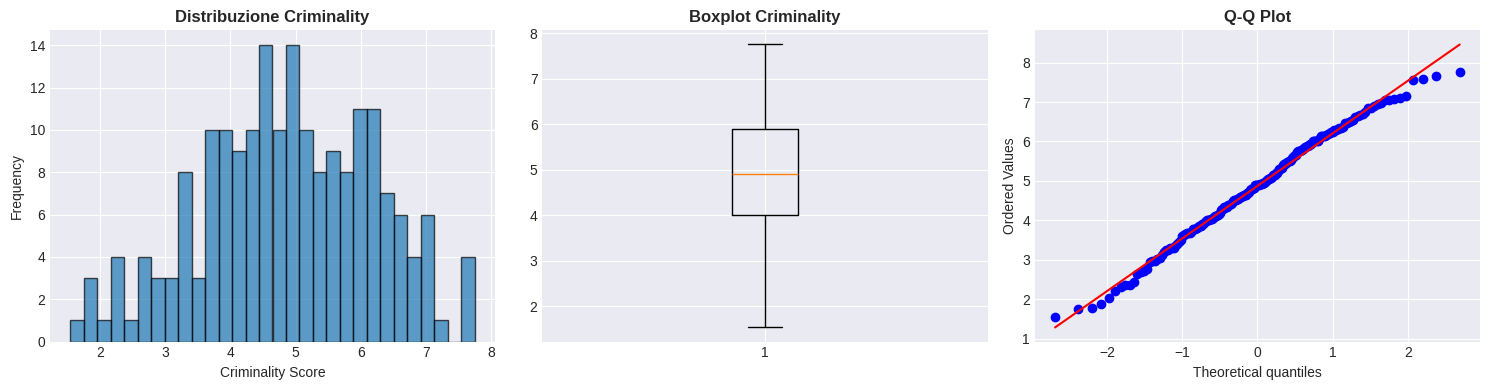

In [69]:
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(df_merged[target_name], bins=30, edgecolor = 'black', alpha = 0.7)
axes[0].set_title('Distribuzione Criminality', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Criminality Score')
axes[0].set_ylabel('Frequency')

axes[1].boxplot(df_merged[target_name])
axes[1].set_title('Boxplot Criminality', fontsize = 12, fontweight='bold')

stats.probplot(df_merged[target_name], dist = "norm", plot = axes[2])
axes[2].set_title('Q-Q Plot', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

* The first graph shows an almost normal distribution, slightky shifted to the left. The peak is around 4.5-5.0
* The central boxplot shows a median of about 5.0, with 50% of countries having crime rates between 4.0 and 5.9 (a fairly compact range).
* The Q-Q Plot shows a distribution very close to normal, with the tails deviating slightly (i.e., it has extreme values that deviates from the theoretical normality)

In light of this analysis, data transformation does not appear necessary, given the almost normal distribution and very low skewness

## Correlations

In [70]:
# select only numeric columns
numeric_cols = df_merged.select_dtypes(include=[np.number]).columns.tolist()


In [71]:
target_corr = df_merged[numeric_cols].corr()[target_name].sort_values(ascending=False)

In [72]:
print('Top 5 positive correlations')
print(target_corr.head(5))

Top 5 positive correlations
criminality_oc                          1.000000
population_total_wdi                    0.199273
inflation_consumer_prices_annual_wdi    0.158760
unemployment_total_of_total_wdi         0.032079
bank_nonperforming_loans_to_wdi         0.004511
Name: criminality_oc, dtype: float64


In [73]:
print('Top 5 negative correlations')
print(target_corr.tail(10))

Top 5 negative correlations
trade_of_gdp_wdi                          -0.294704
school_enrollment_secondary_gross_wdi     -0.295470
gdp_per_capita_current_wdi                -0.351376
government_expenditure_on_education_wdi   -0.391852
regulatory_quality_estimate_wdi           -0.398536
government_effectiveness_estimate_wdi     -0.462638
voice_and_accountability_estimate_wdi     -0.498642
rule_of_law_estimate_wdi                  -0.574553
control_of_corruption_estimate_wdi        -0.602550
political_stability_and_absence_wdi       -0.710083
Name: criminality_oc, dtype: float64


Important insights have emerged, such as the strong negative correlation between crime and political stability or between crime and gdp per capita.  
For now, we will use all the features of the dataset. We will check later whether it would be appropriate to remove any of them and the effect of this action

# Dataset preparation and train/test split

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

In [75]:
df_2021 = pd.read_csv('Data/merged2021.csv')
df_2023 = pd.read_csv('Data/merged2023.csv')
del df_2021['Unnamed: 0']
del df_2023['Unnamed: 0']
df_2023 = df_2023.rename(columns={'criminality_avg_oc':'criminality_oc'})

2023 DF has less indicators because it has more missing values. Remove these indicators from the 2021 dataset

In [76]:
col2021 = set(df_2021.columns)
col2023 = set(df_2023.columns)
col2021-col2023

for i in (col2021-col2023):
    del(df_2021[i])

In [77]:
df_2021.columns

Index(['country', 'continent', 'school_enrollment_secondary_gross_wdi',
       'trade_of_gdp_wdi', 'inflation_consumer_prices_annual_wdi',
       'unemployment_total_of_total_wdi', 'unemployment_youth_total_of_wdi',
       'gdp_growth_annual_wdi', 'gdp_per_capita_current_wdi',
       'government_effectiveness_estimate_wdi',
       'control_of_corruption_estimate_wdi', 'regulatory_quality_estimate_wdi',
       'population_total_wdi', 'population_ages_1564_of_wdi',
       'political_stability_and_absence_wdi', 'life_expectancy_at_birth_wdi',
       'rule_of_law_estimate_wdi', 'urban_population_of_total_wdi',
       'voice_and_accountability_estimate_wdi', 'criminality_oc'],
      dtype='object')

Let's do the train/test split. We'll use the 2021 data for train and validation and the 2023 data for test

In [78]:
X_full_train = df_2021.drop(columns=['criminality_oc', 'country'])
y_full_train = df_2021['criminality_oc']

X_test = df_2023.drop(columns=['criminality_oc', 'country'])
y_test = df_2023['criminality_oc']

In [79]:
X_full_train.shape, X_test.shape, y_full_train.shape, y_test.shape

((193, 18), (193, 18), (193,), (193,))

In [80]:
train_dicts = X_full_train.to_dict(orient='records') 
test_dicts = X_test.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train_encoded = dv.fit_transform(train_dicts)
X_test_encoded = dv.transform(test_dicts)

feature_names = dv.get_feature_names_out()

In [81]:
X_train, X_val, y_train, y_val = train_test_split(X_full_train_encoded, y_full_train, test_size=0.2, random_state=42)

Scale the data

In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_full_train_scaled = scaler.fit_transform(X_full_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)
X_train_scaled= scaler.transform(X_train)
X_val_scaled= scaler.transform(X_val)


# Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

In [ ]:
y_train_pred = lr_model.predict(X_train_scaled)
y_val_pred = lr_model.predict(X_val_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

print("Training")
print(f"   MAE:  {train_mae:.3f}")
print(f"   RMSE: {train_rmse:.3f}")
print(f"   R²:   {train_r2:.3f}")

In [ ]:
val_mae = mean_absolute_error(y_val, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_r2 = r2_score(y_val, y_val_pred)

print("Validation")
print(f"    MAE: {val_mae:.3f}")
print(f"    RMSE: {val_rmse: .3f}")
print(f"    R2: {val_r2:.3f}")


Great news from the validation phase.  
R² Validation (0.704) means that the model explains 70% of the variance in organized crime. Tjis means that WDI features have strong predictive power.  

There is a minimal difference between MAE and RMSE in training and validation, implying no overfitting.

Let's use the model on 2023 dataset, used as Test dataset.

In [ ]:
y_test_pred = lr_model.predict(X_test_scaled)

In [ ]:
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("Testing")
print(f"   MAE:  {test_mae:.3f}")
print(f"   RMSE: {test_rmse: .3f}")
print(f"   R²:   {test_r2:.3f}")

Only a 6.4% R² drop compared to validation, so the model also predicts well on test data.  

Val RMSE = Test RMS ===> validation was robus and representative.  

## Comparison with baseline model

Let's compare our model with a model that predict always the mean

In [ ]:
# Mean baseline predictions
y_train_baseline = np.full_like(y_train, y_train.mean())
y_val_baseline = np.full_like(y_val, y_train.mean())  # Usa media del TRAIN (no leakage!)
y_test_baseline = np.full_like(y_test, y_train.mean())

# Baseline metrics
baseline_train_mae = mean_absolute_error(y_train, y_train_baseline)
baseline_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_baseline))
baseline_train_r2 = r2_score(y_train, y_train_baseline)

baseline_val_mae = mean_absolute_error(y_val, y_val_baseline)
baseline_val_rmse = np.sqrt(mean_squared_error(y_val, y_val_baseline))
baseline_val_r2 = r2_score(y_val, y_val_baseline)

baseline_test_mae = mean_absolute_error(y_test, y_test_baseline)
baseline_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_baseline))
baseline_test_r2 = r2_score(y_test, y_test_baseline)

In [ ]:
print("=" * 80)
print("Compare: LINEAR REGRESSION vs BASELINE")
print("=" * 80)

print("\nTRAIN SET:")
print(f"{'Metric':<15} {'Baseline':<15} {'Linear Reg':<15} {'Improvement':<15}")
print("-" * 60)
print(f"{'MAE':<15} {baseline_train_mae:<15.3f} {train_mae:<15.3f} {((baseline_train_mae - train_mae) / baseline_train_mae * 100):>13.1f}%")
print(f"{'RMSE':<15} {baseline_train_rmse:<15.3f} {train_rmse:<15.3f} {((baseline_train_rmse - train_rmse) / baseline_train_rmse * 100):>13.1f}%")
print(f"{'R²':<15} {baseline_train_r2:<15.3f} {train_r2:<15.3f} {'+':>13}{'N/A':<1}")

print("\nVALIDATION SET:")
print(f"{'Metric':<15} {'Baseline':<15} {'Linear Reg':<15} {'Improvement':<15}")
print("-" * 60)
print(f"{'MAE':<15} {baseline_val_mae:<15.3f} {val_mae:<15.3f} {((baseline_val_mae - val_mae) / baseline_val_mae * 100):>13.1f}%")
print(f"{'RMSE':<15} {baseline_val_rmse:<15.3f} {val_rmse:<15.3f} {((baseline_val_rmse - val_rmse) / baseline_val_rmse * 100):>13.1f}%")
print(f"{'R²':<15} {baseline_val_r2:<15.3f} {val_r2:<15.3f} {'+':>13}{'N/A':<1}")

print("\nTEST SET (2023):")
print(f"{'Metric':<15} {'Baseline':<15} {'Linear Reg':<15} {'Improvement':<15}")
print("-" * 60)
print(f"{'MAE':<15} {baseline_test_mae:<15.3f} {test_mae:<15.3f} {((baseline_test_mae - test_mae) / baseline_test_mae * 100):>13.1f}%")
print(f"{'RMSE':<15} {baseline_test_rmse:<15.3f} {test_rmse:<15.3f} {((baseline_test_rmse - test_rmse) / baseline_test_rmse * 100):>13.1f}%")
print(f"{'R²':<15} {baseline_test_r2:<15.3f} {test_r2:<15.3f} {'+':>13}{'N/A':<1}")

print("\n" + "=" * 80)
print("INTERPRETAZIONE R²:")
print(f"   Baseline R² ≈ 0.0   → Model cannot explain")
print(f"   Linear Reg R² = {test_r2:.3f} → Model explains {test_r2*100:.1f}% of the total variance")
print("=" * 80)

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# ========================================
# ROW 1: Actual vs Predicted
# ========================================

# Train
axes[0, 0].scatter(y_train, y_train_baseline, alpha=0.4, s=30, label='Baseline', color='gray')
axes[0, 0].scatter(y_train, y_train_pred, alpha=0.6, s=50, label='Linear Reg')
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect')
axes[0, 0].set_xlabel('Actual Criminality', fontsize=11)
axes[0, 0].set_ylabel('Predicted Criminality', fontsize=11)
axes[0, 0].set_title('Train Set', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Validation
axes[0, 1].scatter(y_val, y_val_baseline, alpha=0.4, s=30, label='Baseline', color='gray')
axes[0, 1].scatter(y_val, y_val_pred, alpha=0.6, s=50, label='Linear Reg', color='orange')
axes[0, 1].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label='Perfect')
axes[0, 1].set_xlabel('Actual Criminality', fontsize=11)
axes[0, 1].set_ylabel('Predicted Criminality', fontsize=11)
axes[0, 1].set_title('Validation Set', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Test
axes[0, 2].scatter(y_test, y_test_baseline, alpha=0.4, s=30, label='Baseline', color='gray')
axes[0, 2].scatter(y_test, y_test_pred, alpha=0.6, s=50, label='Linear Reg', color='green')
axes[0, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect')
axes[0, 2].set_xlabel('Actual Criminality', fontsize=11)
axes[0, 2].set_ylabel('Predicted Criminality', fontsize=11)
axes[0, 2].set_title('Test Set (2023)', fontsize=12, fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(alpha=0.3)

# ========================================
# ROW 2: Metrics comparison bars
# ========================================

sets = ['Train', 'Val', 'Test']
x_pos = np.arange(len(sets))
width = 0.35

# MAE
mae_baseline = [baseline_train_mae, baseline_val_mae, baseline_test_mae]
mae_model = [train_mae, val_mae, test_mae]

axes[1, 0].bar(x_pos - width/2, mae_baseline, width, label='Baseline', color='gray', alpha=0.7, edgecolor='black')
axes[1, 0].bar(x_pos + width/2, mae_model, width, label='Linear Reg', color='steelblue', alpha=0.8, edgecolor='black')
axes[1, 0].set_ylabel('MAE', fontsize=12)
axes[1, 0].set_title('Mean Absolute Error', fontsize=13, fontweight='bold')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(sets)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# RMSE
rmse_baseline = [baseline_train_rmse, baseline_val_rmse, baseline_test_rmse]
rmse_model = [train_rmse, val_rmse, test_rmse]

axes[1, 1].bar(x_pos - width/2, rmse_baseline, width, label='Baseline', color='gray', alpha=0.7, edgecolor='black')
axes[1, 1].bar(x_pos + width/2, rmse_model, width, label='Linear Reg', color='steelblue', alpha=0.8, edgecolor='black')
axes[1, 1].set_ylabel('RMSE', fontsize=12)
axes[1, 1].set_title('Root Mean Squared Error', fontsize=13, fontweight='bold')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(sets)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

# R²
r2_baseline = [baseline_train_r2, baseline_val_r2, baseline_test_r2]
r2_model = [train_r2, val_r2, test_r2]

axes[1, 2].bar(x_pos - width/2, r2_baseline, width, label='Baseline', color='gray', alpha=0.7, edgecolor='black')
axes[1, 2].bar(x_pos + width/2, r2_model, width, label='Linear Reg', color='steelblue', alpha=0.8, edgecolor='black')
axes[1, 2].set_ylabel('R² Score', fontsize=12)
axes[1, 2].set_title('R² Score', fontsize=13, fontweight='bold')
axes[1, 2].set_xticks(x_pos)
axes[1, 2].set_xticklabels(sets)
axes[1, 2].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[1, 2].legend()
axes[1, 2].grid(axis='y', alpha=0.3)

plt.suptitle('Linear Regression vs Baseline (Mean Prediction)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:

fig = plt.figure(figsize=(16, 10))

# 1. Actual vs Predicted (Train, Val, Test)
ax1 = plt.subplot(2, 3, 1)
ax1.scatter(y_train, y_train_pred, alpha=0.6, s=50, label='Predictions')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2, label='Perfect')
ax1.set_xlabel('Actual Criminality', fontsize=11)
ax1.set_ylabel('Predicted Criminality', fontsize=11)
ax1.set_title(f'Train Set\nR²={train_r2:.3f}, MAE={train_mae:.3f}', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

ax2 = plt.subplot(2, 3, 2)
ax2.scatter(y_val, y_val_pred, alpha=0.6, s=50, color='orange', label='Predictions')
ax2.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2, label='Perfect')
ax2.set_xlabel('Actual Criminality', fontsize=11)
ax2.set_ylabel('Predicted Criminality', fontsize=11)
ax2.set_title(f'Validation Set\nR²={val_r2:.3f}, MAE={val_mae:.3f}', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

ax3 = plt.subplot(2, 3, 3)
ax3.scatter(y_test, y_test_pred, alpha=0.6, s=50, color='green', label='Predictions')
ax3.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect')
ax3.set_xlabel('Actual Criminality', fontsize=11)
ax3.set_ylabel('Predicted Criminality', fontsize=11)
ax3.set_title(f'Test Set (2023)\nR²={test_r2:.3f}, MAE={test_mae:.3f}', fontsize=12, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# # 2. Residuals (errori)
# residuals_train = y_train - y_train_pred
# residuals_val = y_val - y_val_pred
# residuals_test = y_test - y_test_pred

# ax4 = plt.subplot(2, 3, 4)
# ax4.scatter(y_train_pred, residuals_train, alpha=0.6, s=50)
# ax4.axhline(y=0, color='r', linestyle='--', linewidth=2)
# ax4.set_xlabel('Predicted Criminality', fontsize=11)
# ax4.set_ylabel('Residuals', fontsize=11)
# ax4.set_title('Residuals - Train', fontsize=12, fontweight='bold')
# ax4.grid(alpha=0.3)

# ax5 = plt.subplot(2, 3, 5)
# ax5.scatter(y_val_pred, residuals_val, alpha=0.6, s=50, color='orange')
# ax5.axhline(y=0, color='r', linestyle='--', linewidth=2)
# ax5.set_xlabel('Predicted Criminality', fontsize=11)
# ax5.set_ylabel('Residuals', fontsize=11)
# ax5.set_title('Residuals - Validation', fontsize=12, fontweight='bold')
# ax5.grid(alpha=0.3)

# ax6 = plt.subplot(2, 3, 6)
# ax6.scatter(y_test_pred, residuals_test, alpha=0.6, s=50, color='green')
# ax6.axhline(y=0, color='r', linestyle='--', linewidth=2)
# ax6.set_xlabel('Predicted Criminality', fontsize=11)
# ax6.set_ylabel('Residuals', fontsize=11)
# ax6.set_title('Residuals - Test (2023)', fontsize=12, fontweight='bold')
# ax6.grid(alpha=0.3)

plt.suptitle('Linear Regression - Complete Analysis', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

In [ ]:
# Bar plot metriche
metrics_df = pd.DataFrame({
    'Set': ['Train', 'Validation', 'Test'],
    'MAE': [train_mae, val_mae, test_mae],
    'RMSE': [train_rmse, val_rmse, test_rmse],
    'R²': [train_r2, val_r2, test_r2]
})

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# MAE
axes[0].bar(metrics_df['Set'], metrics_df['MAE'], color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.8, edgecolor='black')
axes[0].set_ylabel('MAE', fontsize=12)
axes[0].set_title('Mean Absolute Error', fontsize=13, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(metrics_df['MAE']):
    axes[0].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# RMSE
axes[1].bar(metrics_df['Set'], metrics_df['RMSE'], color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.8, edgecolor='black')
axes[1].set_ylabel('RMSE', fontsize=12)
axes[1].set_title('Root Mean Squared Error', fontsize=13, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(metrics_df['RMSE']):
    axes[1].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

# R²
axes[2].bar(metrics_df['Set'], metrics_df['R²'], color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.8, edgecolor='black')
axes[2].set_ylabel('R² Score', fontsize=12)
axes[2].set_title('R² Score', fontsize=13, fontweight='bold')
axes[2].set_ylim([0, 1])
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(metrics_df['R²']):
    axes[2].text(i, v + 0.02, f'{v:.3f}', ha='center', fontweight='bold')

plt.suptitle('Performance Metrics Comparison', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Decision Tree

In [84]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
# hyperparameters grid
dt_parameters = {
    'max_depth': [3,5,7,10,15,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    dt_parameters,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=1,
    verbose=1
)


In [ ]:
dt_grid.fit(X_train_scaled, y_train)


In [ ]:
print(f"Best params: {dt_grid.best_params_}")
print(f"Best cv MAE: {dt_grid.best_score_:.3f}")

In [ ]:
best_dt = dt_grid.best_estimator_

In [ ]:
y_train_pred_dt = best_dt.predict(X_train_scaled)
y_val_pred_dt = best_dt.predict(X_val_scaled)

train_mae_dt = mean_absolute_error(y_train, y_train_pred_dt)
train_rmse_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
train_r2_dt = r2_score(y_train, y_train_pred_dt)

val_mae_dt = mean_absolute_error(y_val, y_val_pred_dt)
val_rmse_dt = np.sqrt(mean_squared_error(y_val, y_val_pred_dt))
val_r2_dt = r2_score(y_val, y_val_pred_dt)

print(f"\nTRAIN SET:")
print(f"   MAE:  {train_mae_dt:.3f}")
print(f"   RMSE: {train_rmse_dt:.3f}")
print(f"   R²:   {train_r2_dt:.3f}")

print(f"\nVALIDATION SET:")
print(f"   MAE:  {val_mae_dt:.3f}")
print(f"   RMSE: {val_rmse_dt:.3f}")
print(f"   R²:   {val_r2_dt:.3f}")

DT overfitting is evident in the difference between train and val.
Let's use more restrictive parameters

In [ ]:
# hyperparameters grid
dt_parameters = {
    'max_depth': [3,4,5,6],
    'min_samples_split': [20,30,40],
    'min_samples_leaf': [10,15,20],
}

dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    dt_parameters,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=1,
    verbose=1
)

dt_grid.fit(X_train_scaled, y_train)


In [ ]:
print(f"Best params: {dt_grid.best_params_}")

In [ ]:
y_train_pred_dt = best_dt.predict(X_train_scaled)
y_val_pred_dt = best_dt.predict(X_val_scaled)

train_mae_dt = mean_absolute_error(y_train, y_train_pred_dt)
train_rmse_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
train_r2_dt = r2_score(y_train, y_train_pred_dt)

val_mae_dt = mean_absolute_error(y_val, y_val_pred_dt)
val_rmse_dt = np.sqrt(mean_squared_error(y_val, y_val_pred_dt))
val_r2_dt = r2_score(y_val, y_val_pred_dt)

print(f"\nTRAIN SET:")
print(f"   MAE:  {train_mae_dt:.3f}")
print(f"   RMSE: {train_rmse_dt:.3f}")
print(f"   R²:   {train_r2_dt:.3f}")

print(f"\nVALIDATION SET:")
print(f"   MAE:  {val_mae_dt:.3f}")
print(f"   RMSE: {val_rmse_dt:.3f}")
print(f"   R²:   {val_r2_dt:.3f}")

Even when changing the order of the parameters, regression with decision trees yields worse results than linear regression.  
Valutiamo il random forest

# Random Forest with K-Fold Cross Validation

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [85]:
from sklearn.ensemble import RandomForestRegressor

rf_parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf_grid =GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    rf_parameters,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)



In [86]:
rf_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'neg_mean_absolute_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [87]:
print(f"\n✅ Best params: {rf_grid.best_params_}")
print(f"📊 Best CV MAE: {-rf_grid.best_score_:.3f}")


✅ Best params: {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
📊 Best CV MAE: 0.671


In [88]:
best_rf = rf_grid.best_estimator_

In [91]:
y_train_pred_rf = best_rf.predict(X_train_scaled)
y_val_pred_rf = best_rf.predict(X_val_scaled)

train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
train_r2_rf = r2_score(y_train, y_train_pred_rf)

val_mae_rf = mean_absolute_error(y_val, y_val_pred_rf)
val_rmse_rf = np.sqrt(mean_squared_error(y_val, y_val_pred_rf))
val_r2_rf = r2_score(y_val, y_val_pred_rf)

In [92]:
print('Random forest')
print(f"\nTRAIN SET:")
print(f"   MAE:  {train_mae_rf:.3f}")
print(f"   RMSE: {train_rmse_rf:.3f}")
print(f"   R²:   {train_r2_rf:.3f}")

print(f"\nVALIDATION SET:")
print(f"   MAE:  {val_mae_rf:.3f}")
print(f"   RMSE: {val_rmse_rf:.3f}")
print(f"   R²:   {val_r2_rf:.3f}")

Random forest

TRAIN SET:
   MAE:  0.236
   RMSE: 0.289
   R²:   0.949

VALIDATION SET:
   MAE:  0.542
   RMSE: 0.700
   R²:   0.774


In [93]:
# Comparison with Linear Regression
print(f"\n Comparison with Linear Regression:")
print(f"{'Metric':<20} {'Linear Reg':<15} {'Random Forest':<15} {'Delta'}")
print("-" * 70)
print(f"{'Train R²':<20} {train_r2:.3f}{'':<11} {train_r2_rf:.3f}{'':<11} {(train_r2_rf-train_r2):+.3f}")
print(f"{'Val R²':<20} {val_r2:.3f}{'':<11} {val_r2_rf:.3f}{'':<11} {(val_r2_rf-val_r2):+.3f}")
print(f"{'Val MAE':<20} {val_mae:.3f}{'':<11} {val_mae_rf:.3f}{'':<11} {(val_mae_rf-val_mae):+.3f}")
print(f"{'Gap (Train-Val R²)':<20} {(train_r2-val_r2):.3f}{'':<11} {(train_r2_rf-val_r2_rf):.3f}{'':<11} {((train_r2_rf-val_r2_rf)-(train_r2-val_r2)):+.3f}")



 Comparison with Linear Regression:
Metric               Linear Reg      Random Forest   Delta
----------------------------------------------------------------------


NameError: name 'train_r2' is not defined

In [94]:
# Try RF on the test set
print("\n🌳 Random Forest - Retrain on 193 countries (2021)")
rf_final = RandomForestRegressor(**rf_grid.best_params_, random_state=42, n_jobs=-1)
rf_final.fit(X_full_train_scaled, y_full_train)


🌳 Random Forest - Retrain on 193 countries (2021)


,n_estimators,300
,criterion,'squared_error'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [95]:
y_test_pred_rf = rf_final.predict(X_test_scaled)

In [96]:

test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))
test_r2_rf = r2_score(y_test, y_test_pred_rf)


In [98]:
print(f"\nTEST SET (2023):")
print(f"   MAE:  {test_mae_rf:.3f}")
print(f"   RMSE: {test_rmse_rf:.3f}")
print(f"   R²:   {test_r2_rf:.3f}")

# Confronto test
print(f"\n Comparison TEST 2023:")
print(f"{'Model':<20} {'MAE':<10} {'RMSE':<10} {'R²':<10}")
print("-" * 50)
# print(f"{'Linear Regression':<20} {test_mae:.3f}{'':<6} {test_rmse:.3f}{'':<6} {test_r2:.3f}")
print(f"{'Random Forest':<20} {test_mae_rf:.3f}{'':<6} {test_rmse_rf:.3f}{'':<6} {test_r2_rf:.3f}")
print("-" * 50)

if test_r2_rf > test_r2:
    improvement = ((test_r2_rf - test_r2) / test_r2) * 100
    print(f" Random Forest wins")
    print(f"   R² Improvement: +{improvement:.1f}%")
    print(f"   MAE Reduction: {(test_mae - test_mae_rf):.3f}")
else:
    print(f"🥈 Linear Regression is the best")
    print(f"   R² difference: {(test_r2_rf - test_r2):+.3f}")

print("=" * 80)


TEST SET (2023):
   MAE:  0.475
   RMSE: 0.607
   R²:   0.794

 Comparison TEST 2023:
Model                MAE        RMSE       R²        
--------------------------------------------------
Random Forest        0.475       0.607       0.794
--------------------------------------------------


NameError: name 'test_r2' is not defined

## Feature importance

In [ ]:
feature_importance_rf = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_final.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
print(f"Top 10 most important features")
print(feature_importance_rf.head(10).to_string(index=False))

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
top_10 = feature_importance_rf.head(10).sort_values('importance')
bars = ax.barh(range(len(top_10)), top_10['importance'], color='forestgreen', alpha=0.8, edgecolor='black')
ax.set_yticks(range(len(top_10)))
ax.set_yticklabels(top_10['feature'], fontsize=10)
ax.set_xlabel('Importance', fontsize=12, fontweight='bold')
ax.set_title('Top 10 feature importance - Random Forest', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# add values on bars
for i, (idx, row) in enumerate(top_10.iterrows()):
    ax.text(row['importance']+0.002, i, f"{row['importance']:.3f}",
            va='center', fontsize=9, fontweight='bold')
    
plt.tight_layout()
plt.show()

In [ ]:
print("Comparison:  Feature importance VS Correlation")
top_10_rf = feature_importance_rf.head(10)['feature'].tolist()

for feat in top_10_rf:
    if feat in target_corr.index:
        corr_val = target_corr[feat]
        imp_val = feature_importance_rf[feature_importance_rf['feature']==feat]['importance'].values[0]
        print(f"{feat:<45} Imp: {imp_val:.3f}  Corr: {corr_val:+.3f}")

In [ ]:
# Plot actual vs predicted (test set)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Linear Regression
axes[0].scatter(y_test, y_test_pred, alpha=0.6, s=60, color='steelblue', edgecolor='black', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect')
axes[0].set_xlabel('Actual Criminality', fontsize=12)
axes[0].set_ylabel('Predicted Criminality', fontsize=12)
axes[0].set_title(f'Linear Regression - Test 2023\nR²={test_r2:.3f}, MAE={test_mae:.3f}', 
                  fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Random Forest
axes[1].scatter(y_test, y_test_pred_rf, alpha=0.6, s=60, color='forestgreen', edgecolor='black', linewidth=0.5)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect')
axes[1].set_xlabel('Actual Criminality', fontsize=12)
axes[1].set_ylabel('Predicted Criminality', fontsize=12)
axes[1].set_title(f'Random Forest - Test 2023\nR²={test_r2_rf:.3f}, MAE={test_mae_rf:.3f}', 
                  fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# XGBOOST

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_parameters = {
    'n_estimators': [50, 100, 150],              # Meno alberi
    'max_depth': [3, 4, 5],                      # Alberi poco profondi
    'learning_rate': [0.01, 0.05],               # Learning rate basso
    'subsample': [0.7, 0.8],                     # Subsample più basso
    'colsample_bytree': [0.7, 0.8],              # Meno feature per albero
    'min_child_weight': [5, 10, 15],             # Foglie grandi (regolarizzazione)
    'reg_alpha': [0.01, 0.1, 0.5],               # L1 regularization
    'reg_lambda': [0.01, 0.1, 0.5]               # L2 regularization
}

In [ ]:
xgb_grid = GridSearchCV(
    XGBRegressor(random_state=42, n_jobs=-1, three_methods='hist'),
    xgb_parameters,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=0
    )

In [ ]:
print("Training XGBOOST")
xgb_grid.fit(X_train_scaled, y_train)

In [ ]:

print(f"\n✅ Best params: {xgb_grid.best_params_}")
print(f"📊 Best CV MAE: {-xgb_grid.best_score_:.3f}")

In [ ]:
best_xgb = xgb_grid.best_estimator_

In [ ]:
y_train_pred_xgb = best_xgb.predict(X_train_scaled)
y_val_pred_xgb = best_xgb.predict(X_val_scaled)


train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
train_rmse_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
train_r2_xgb = r2_score(y_train, y_train_pred_xgb)

val_mae_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
val_rmse_xgb = np.sqrt(mean_squared_error(y_val, y_val_pred_xgb))
val_r2_xgb = r2_score(y_val, y_val_pred_xgb)

In [ ]:
print(f"\nTRAIN SET:")
print(f"   MAE:  {train_mae_xgb:.3f}")
print(f"   RMSE: {train_rmse_xgb:.3f}")
print(f"   R²:   {train_r2_xgb:.3f}")

print(f"\nVALIDATION SET:")
print(f"   MAE:  {val_mae_xgb:.3f}")
print(f"   RMSE: {val_rmse_xgb:.3f}")
print(f"   R²:   {val_r2_xgb:.3f}")

In [ ]:
xgb_final = XGBRegressor(**xgb_grid.best_params_, random_state = 42, n_jobs=-1, tree_method='hist')
xgb_final.fit(X_full_train_scaled, y_full_train)

In [ ]:
y_test_pred_xgb = xgb_final.predict(X_test_scaled)

In [ ]:
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
test_rmse_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)


In [ ]:
print(f"\n TEST SET (2023):")
print(f"   MAE:  {test_mae_xgb:.3f}")
print(f"   RMSE: {test_rmse_xgb:.3f}")
print(f"   R²:   {test_r2_xgb:.3f}")

In [ ]:
# Confronto test
print(f"\n Comparison TEST 2023:")
print(f"{'Model':<20} {'MAE':<10} {'RMSE':<10} {'R²':<10}")
print("-" * 50)
print(f"{'Linear Regression':<20} {test_mae:.3f}{'':<6} {test_rmse:.3f}{'':<6} {test_r2:.3f}")
print(f"{'Random Forest':<20} {test_mae_rf:.3f}{'':<6} {test_rmse_rf:.3f}{'':<6} {test_r2_rf:.3f}")
print(f"{'XGBoost':<20} {test_mae_xgb:.3f}{'':<6} {test_rmse_xgb:.3f}{'':<6} {test_r2_xgb:.3f}")
print("-" * 50)


The performance of xgboost is almost comparable to that of random forest.